# Project 2: Ames Housing Project
### Javier Martinez Abrego Cantu

---

## Executive Summary


### Contents:
- [Problem Statement](#Problem-Statement)
- [Data Dictionary](#2018-Data-Import-and-Cleaning)
- [Data Loading and Imports](#Data-Loading-and-Imports)
- [Exploratory Data Analysis](#Exploratory Data Analysis)
- [Determining Outliers](##Determining-Outliers)
- [Data Engineering](#Data-Engineering)
- [Finding The Features With Most Correlation to Sale Price](#Finding-the-features-with-most-correlation-to-Sale-Price)
- [Data Modeling: Train Test Split](#Data-Modeling)
- [Data Modeling: Training The Data](##Training-Our-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

---


## Problem Statement
Real estate is a business that changes year by year. Since there are uncountably many different variables that influence the price of a house, predicting the price of a house can be quite complicated. Using the Ames, Iowa housing dataset, can we create a model to predict house prices based on features that I believe highly influence the price of a house?


---


## Data Dictionary

Reference the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) for the Ames Dataset to fully understand the contesnts of the dataset.

---


# Data Loading and Imports

In [805]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [806]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

# Exploratory Data Analysis

In [807]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [808]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [809]:
train.shape

(2051, 81)

In [810]:
no_null = [x for x in train.columns if train[x].isnull().sum() != 0]    #Checking which columns have null values
with_null = [x for x in train.columns if train[x].isnull().sum() == 0]       #Checking which columns dont have null values

print(f'Columns with no nulls: {no_null}')
print('')
print(f'Columns with nulls: {with_null}')

Columns with no nulls: ['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']

Columns with nulls: ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen 

In [811]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

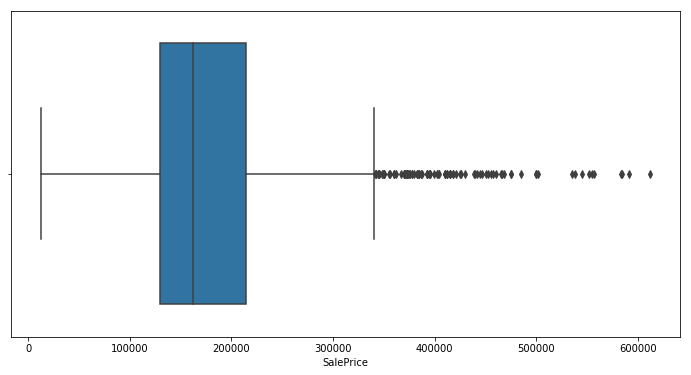

In [812]:
plt.figure(figsize = (12,6))
sns.boxplot(train['SalePrice'])

Note that on the barplot above, the blue box indicates the Q1 to Q3 range while the vertical lines (extremes) indicate 1.5 * ( Q1 - IQR) and 1.5 * ( Q3 + IQR) respectivley  where IQR = Q3 − Q1. Removing the indicated outliers seems like it would remove way more data points than what we would like. Therefore we would like to search another way for outliers

## Determining Outliers 


Text(0.5, 1.0, 'Sale Price vs Living Area')

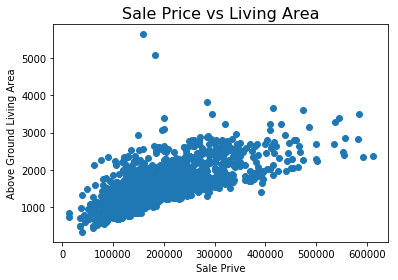

In [813]:
plt.scatter(train['SalePrice'],train['Gr Liv Area'])
plt.xlabel('Sale Prive')
plt.ylabel('Above Ground Living Area')
plt.title('Sale Price vs Living Area', fontsize =16)

Text(0.5, 1.0, 'Log of Sale Price vs Living Area')

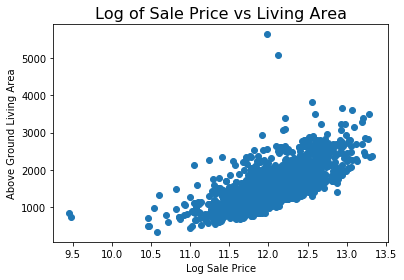

In [814]:
plt.scatter(np.log(train['SalePrice']),train['Gr Liv Area'])
plt.xlabel('Log Sale Price')
plt.ylabel('Above Ground Living Area')
plt.title('Log of Sale Price vs Living Area' , fontsize =16)

Looking at the graph of Living Area vs Sale price, we can clearly see two outliers in each graph. With the code below, we can see that both houses are actually finished. Because of this, we believe that the sale price is probably due to external conditions that we would not affect other houses (eg. sold through family). Therefore we classify them as outliers so that they do not influence our predicting model.

In [815]:
big_houses = train[train['Gr Liv Area']>4000]
big_houses['Low Qual Fin SF']

960     0
1885    0
Name: Low Qual Fin SF, dtype: int64

In [816]:
train[np.log(train['SalePrice'])<10]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,12789


In [817]:
log_price = train[np.log(train['SalePrice'])<10]
log_price

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,12789


In [818]:
train = train.drop(960)
train = train.drop(1885) 
train = train.drop(183)    
train = train.drop(1628)    #Dropping outliers

Text(0.5, 1.0, 'Living Area vs Sale Price (Without Outliers)')

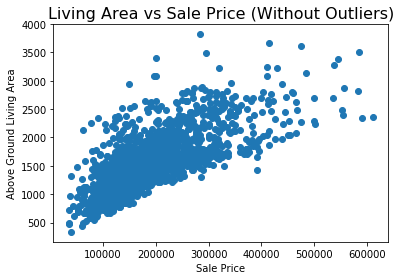

In [819]:
plt.scatter(train['SalePrice'],train['Gr Liv Area'])
plt.xlabel('Sale Price')
plt.ylabel('Above Ground Living Area')
plt.title('Living Area vs Sale Price (Without Outliers)', fontsize =16)

# Data Engineering

In this section we will go thoguth the database filling in null values with appropriate values (when applicable) and either qantifying qualitative data or creating dummy variables for qualitative data

In [820]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Using the data documentation for the dataset, I was able to find the descriptions for each of the columns. Some of the qalitative columns I changed to numerical values based on my own intuition. I did not use a linear change from values because that would be the same as saying 'the change in price from a poor to fair basement is the same as a change in price from a good to excellent'. The following functions are functions to quantify those qualitative features

In [821]:
def descriptive_to_numbers(column):
    columnnona = column.fillna('NA')
    numbered = columnnona.map({'Ex':20,'Gd':15,'TA':10,'Fa':7,'Po':5,'NA':0})
    
    return numbered

def descriptive_to_numbers_no_po(column):
    columnnona = column.fillna('NA')
    numbered = columnnona.map({'Ex':20,'Gd':15,'TA':10,'Fa':7,'NA':0})
    
    return numbered

def basement_to_numbers(column):
    columnnona = column.fillna('NA')
    numbered = columnnona.map({'GLQ':20,'ALQ':15,'BLQ':10,'Rec':9,'LwQ':6,'Unf':4,'NA':0})
    
    return numbered

After creating those functions, we have to apply them to the actual dataset. I also made a function for all the changes I make to the dataset so that the changes I made from the training data to the test data

In [822]:
def changes_to_dataframe(df):
    
    #Filling in the NA for data that is highly correlated
    df['Garage Area'] = df['Garage Area'].fillna(0)
    df['Garage Cars'] = df['Garage Cars'].fillna(0)
    df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
    df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])
    df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
    df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)   
    df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0)  #Filling an NA in BsmtFin SF 1 that has no basement so no SF
    df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0)        #Filling an NA in Bsmt Unf SF that has no basement so no SF
    df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())        #Filling an NA in Lot Frontage with average frontage
    df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)       #Filling an NA in Bsmt Full Bath that has no basement so no SF
    df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)
    df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
    df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('NA') 
    
    
    #Creating new columns based on what I believe are good indicators of a pricing
    df['Basement + Liv Area'] = df['Total Bsmt SF'] + df['Gr Liv Area']
    df['Total Number Of Bathrooms Scaled'] = df['Bsmt Full Bath'] + df['Bsmt Half Bath']*.5 + df['Full Bath'] + df['Half Bath']*.5
    df['Multiple Basement Score'] = df['BsmtFin Type 1'] + df['BsmtFin Type 2']
    
    
    #Applying the functions we had made before
    df['Exter Qual'] = descriptive_to_numbers(df['Exter Qual'])
    df['Exter Cond'] = descriptive_to_numbers(df['Exter Cond'])
    df['Bsmt Cond'] = descriptive_to_numbers(df['Bsmt Cond'])
    df['Bsmt Qual'] = descriptive_to_numbers(df['Bsmt Qual'])
    df['Heating QC'] = descriptive_to_numbers(df['Heating QC'])
    df['Kitchen Qual'] = descriptive_to_numbers(df['Kitchen Qual'])
    df['Fireplace Qu'] = descriptive_to_numbers(df['Fireplace Qu'])
    df['Garage Qual'] = descriptive_to_numbers(df['Garage Qual'])
    df['Garage Cond'] = descriptive_to_numbers(df['Garage Cond'])
    df['Pool QC'] = descriptive_to_numbers_no_po(df['Pool QC'])
    df['BsmtFin Type 1'] = basement_to_numbers(df['BsmtFin Type 1'])
    df['BsmtFin Type 2'] = basement_to_numbers(df['BsmtFin Type 2'])
    
    
    #Classifying Neighborhoods by average price per house
    avg_price_per_neigh = train['SalePrice'].groupby(df['Neighborhood']).mean().sort_values()
    df['NeighborhoodAvgCostPerHouse'] = df['Neighborhood'].map(avg_price_per_neigh)

    
    
    #Overall Quality Multipliers
    df['Overall Quality * Basement + Liv Area'] = df['Overall Qual'] * df['Basement + Liv Area']
    df['Overall Quality * Garage Area'] = df['Overall Qual'] * df['Garage Area']
    df['Overall Quality * Gr Liv Area'] = df['Overall Qual'] * df['Gr Liv Area']
    df['Overall Quality * TotRms AbvGrd'] = df['Overall Qual'] * df['TotRms AbvGrd']
    df['Overall Quality * Total Number Of Bathrooms Scaled'] = df['Overall Qual'] * df['Total Number Of Bathrooms Scaled']
    df['Overall Quality * Exter Qual'] = df['Overall Qual'] * df['Exter Qual']
    df['Overall Quality * NeighborhoodAvgCostPerHouse'] = df['Overall Qual'] * df['NeighborhoodAvgCostPerHouse']
    
     #Overall Condition Multipliers
    df['Overall Condition * Basement + Liv Area'] = df['Overall Cond'] * df['Basement + Liv Area']
    df['Overall Condition * Garage Area'] = df['Overall Cond'] * df['Garage Area']
    df['Overall Condition * Gr Liv Area'] = df['Overall Cond'] * df['Gr Liv Area']
    df['Overall Condition * TotRms AbvGrd'] = df['Overall Cond'] * df['TotRms AbvGrd']
    df['Overall Condition * Total Number Of Bathrooms Scaled'] = df['Overall Cond'] * df['Total Number Of Bathrooms Scaled']
    df['Overall Condition * Exter Qual'] = df['Overall Cond'] * df['Exter Qual']
    df['Overall Condition * NeighborhoodAvgCostPerHouse'] = df['Overall Cond'] * df['NeighborhoodAvgCostPerHouse']
    
     #Getting Dummies
    df = pd.get_dummies(data=df, columns=['Misc Feature',
                                         'Neighborhood',
                                         'Functional',
                                         'Garage Finish',
                                         'Lot Config',
                                         'Land Slope',
                                         'Condition 1',
                                         'Condition 2',
                                         'Roof Matl',
                                         'Alley',
                                         'Street',
                                         'Utilities',
                                         'MS Zoning',
                                         'MS SubClass',
                                         'Lot Shape',
                                         'Land Contour',
                                         'Bldg Type',
                                         'Roof Style',
                                         'House Style'])
    
   
    return df

In [823]:
train = changes_to_dataframe(train)
train.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,...,Roof Style_Mansard,Roof Style_Shed,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,109,533352170,68.873034,13517,6,8,1976,2005,HdBoard,Plywood,...,0,0,0,0,0,0,0,1,0,0
1,544,531379050,43.000000,11492,7,5,1996,1997,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
2,153,535304180,68.000000,7922,5,7,1953,2007,VinylSd,VinylSd,...,0,0,0,0,1,0,0,0,0,0
3,318,916386060,73.000000,9802,5,5,2006,2007,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
4,255,906425045,82.000000,14235,6,8,1900,1993,Wd Sdng,Plywood,...,0,0,1,0,0,0,0,0,0,0


# Finding The Features With Most Correlation With Sale Price

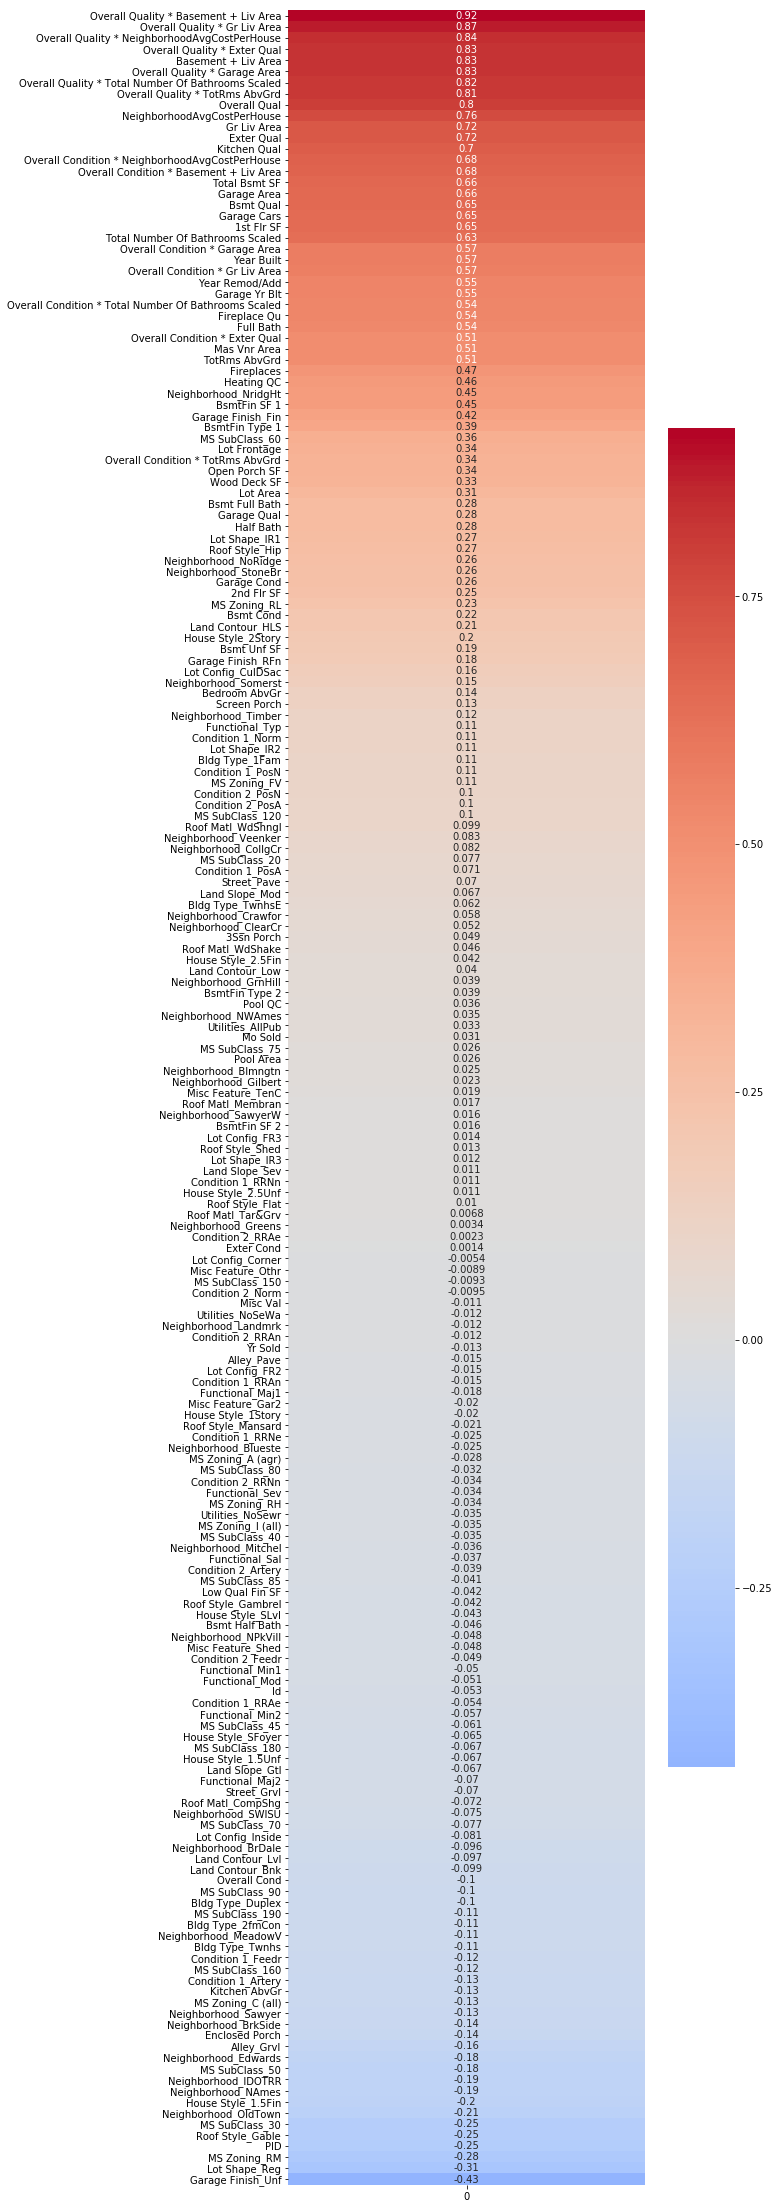

In [824]:
train_corr = train.corrwith(train['SalePrice']).sort_values(ascending=False)[1:]
train.corrwith(train['SalePrice']).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,40))
sns.heatmap(train_corr.to_frame(), center=0, cmap='coolwarm', annot=True)

In [825]:
train_corr_abs = abs(train_corr).sort_values(ascending = False)

In [826]:
features = list(train_corr_abs.index[0:60])
X = train[features]
y = train['SalePrice']

# Data Modeling



## Doing a Train/Test split to test a model

### Train/Test Split

In [827]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Scaling

In [828]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Instantiating our models

In [829]:
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

### Finding our optimal alphas for ridge and lasso

In [830]:
lasso = LassoCV()
lasso.fit(X_train_sc, y_train_log)
l_alpha = lasso.alpha_

ridge = RidgeCV()
ridge.fit(X_train_sc, y_train_log)
r_alpha = ridge.alpha_


print(f'Lasso Alpha: {l_alpha}')
print(f'Ridge Alpha: {r_alpha}')


Lasso Alpha: 0.002538266986364023
Ridge Alpha: 10.0


### Finding Cross Val scores

In [831]:

lasso_scores = cross_val_score(Lasso(alpha=l_alpha), X_train_sc, y_train_log, cv=5).mean()
ridge_scores = cross_val_score(Ridge(alpha=r_alpha), X_train_sc, y_train_log, cv=5).mean()

print(f'Lasso CV Score: {lasso_scores}')
print(f'Ridge CV Score: {ridge_scores}')

Lasso CV Score: 0.9120570856915504
Ridge CV Score: 0.9115737013583602


### Finding R2 Scores

In [832]:
lr.fit(X_train_sc, y_train_log)
lasso.fit(X_train_sc, y_train_log)
ridge.fit(X_train_sc, y_train_log)

lr_predict = np.exp(lr.predict(X_test_sc))
lasso_predict = np.exp(lasso.predict(X_test_sc))
ridge_predict = np.exp(ridge.predict(X_test_sc))



lr_r2 = r2_score(y_test, lr_predict)
lasso_r2 = r2_score(y_test, lasso_predict)
ridge_r2 = r2_score(y_test, ridge_predict)

print(f'Linear Regresion R2: {lr_r2}')
print(f'Lasso R2 Score: {lasso_r2}')
print(f'Ridge R2 Score: {ridge_r2}')

Linear Regresion R2: 0.9181351199388348
Lasso R2 Score: 0.9180849802434841
Ridge R2 Score: 0.9189124898775946


In [833]:
(mean_squared_error(y_test, lasso_predict))**(1/2)

22248.34711855133

### Visualizing Residuals

Text(0.5, 1.0, 'Distribution of Residuals')

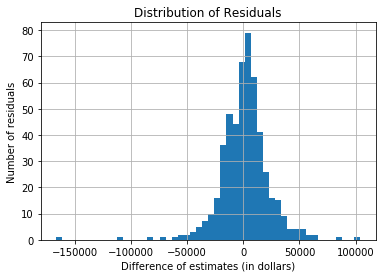

In [834]:
residuals = y_test - ridge_predict
residuals.hist(bins=50)
plt.xlabel('Difference of estimates (in dollars)')
plt.ylabel('Number of residuals')
plt.title('Distribution of Residuals')

Residuals look evenly ditributed. This is due to the fact that we took the log of y to be able to get more normaly distributed residuals

Text(0.5, 1.0, 'Distribution of Residuals')

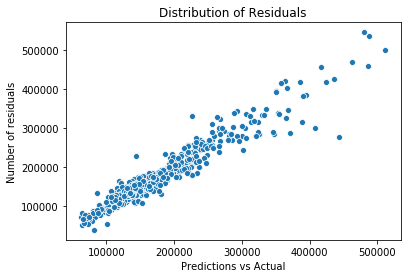

In [835]:
sns.scatterplot(ridge_predict, y_test)
plt.xlabel('Predictions vs Actual')
plt.ylabel('Number of residuals')
plt.title('Distribution of Residuals')

## Training Our Data

### Scaling

In [836]:
y_log = np.log(y)

X_sc = ss.transform(X)

### Instantiating our models

In [837]:
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

### Finding our optimal alphas for ridge and lasso

In [838]:

lasso.fit(X_sc, y_log)
l_alpha = lasso.alpha_

ridge.fit(X_sc, y_log)
r_alpha = ridge.alpha_


print(f'Lasso Alpha: {l_alpha}')
print(f'Ridge Alpha: {r_alpha}')


Lasso Alpha: 0.0021776754005947674
Ridge Alpha: 10.0


### Finding Cross Val scores

In [839]:

lasso_scores = cross_val_score(Lasso(alpha=l_alpha), X_sc, y_log, cv=5).mean()
ridge_scores = cross_val_score(Ridge(alpha=r_alpha), X_sc, y_log, cv=5).mean()


print(f'Lasso CV Score: {lasso_scores}')
print(f'Ridge CV Score: {ridge_scores}')

Lasso CV Score: 0.9124560775367158
Ridge CV Score: 0.91257279750633


### Finding R2 Scores

In [840]:
lr.fit(X_sc, y_log)
lasso.fit(X_sc, y_log)
ridge.fit(X_sc, y_log)

lr_predict = np.exp(lr.predict(X_sc))
lasso_predict = np.exp(lasso.predict(X_sc))
ridge_predict = np.exp(ridge.predict(X_sc))



lr_r2 = r2_score(y, lr_predict)
lasso_r2 = r2_score(y, lasso_predict)
ridge_r2 = r2_score(y, ridge_predict)

print(f'Linear Regresion R2: {lr_r2}')
print(f'Lasso R2 Score: {lasso_r2}')
print(f'Ridge R2 Score: {ridge_r2}')

Linear Regresion R2: 0.9283347001371869
Lasso R2 Score: 0.9271589626493486
Ridge R2 Score: 0.9288210453944623


Based on the scores that I got, I would use my Lasso Regressor since It got the highest R2 score

In [841]:
ridge_model = RidgeCV(alphas=l_alpha)
ridge_model = ridge.fit(X_sc, y_log)


In [842]:
test = changes_to_dataframe(test)
test.head()

,Id,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,...,Roof Style_Mansard,Roof Style_Shed,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,2658,902301120,69.000000,9142,6,8,1910,1950,AsbShng,AsbShng,...,0,0,0,0,0,0,0,1,0,0
1,2718,905108090,69.630042,9662,5,4,1977,1977,Plywood,Plywood,...,0,0,0,0,1,0,0,0,0,0
2,2414,528218130,58.000000,17104,7,5,2006,2006,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
3,1989,902207150,60.000000,8520,5,6,1923,2006,Wd Sdng,Wd Sdng,...,0,0,0,0,1,0,0,0,0,0
4,625,535105100,69.630042,9500,6,5,1963,1963,Plywood,Plywood,...,0,0,0,0,1,0,0,0,0,0


### Setting up features

In [843]:
X_actual_test = test[features]

### Scaling

In [844]:
X_actual_test_sc = ss.transform(X_actual_test)

### Creating Predictions

In [845]:
predictions = np.exp(ridge_model.predict(X_actual_test_sc))

In [846]:
pd.DataFrame(ridge_model.coef_,index=X_actual_test.columns).sort_values(0, ascending = False)

,0
Overall Qual,0.066341
Overall Quality * Exter Qual,0.052797
Total Number Of Bathrooms Scaled,0.048350
Overall Condition * TotRms AbvGrd,0.047145
Year Built,0.043642
1st Flr SF,0.034207
NeighborhoodAvgCostPerHouse,0.034178
Overall Condition * Gr Liv Area,0.033328
BsmtFin SF 1,0.032247
Overall Quality * Garage Area,0.030392


In [847]:
test['SalePrice'] = predictions

In [848]:
submission = test[['Id','SalePrice']]
submission.head()

,Id,SalePrice
0,2658,151627.435941
1,2718,165277.389077
2,2414,203930.559558
3,1989,102808.028373
4,625,171062.316683


## Submitting to Kaggle
Below, I am doing the necessary steps to create the predictions based on my train data and putting them in an appropriate dataframe that allows me to submit to Kaggle

In [849]:
#submission.to_csv('javier_ames_12_06_16.csv', index=False)

---

# Conclusions and Recomendations

In general, this was a fun project to complete. While at first, it was somewhat time consuming being able to get the regression models to work, it was fun to work through the data engineering and working with moving the dataset around. Even though this was my first actual data science problem, especially my first time working through a project involving regression, I am quite proud of the result of the project. I would have liked to have a bigger dataset so that I could engineer more columns that I thought were valuable, or make my columns more solid. For example in my train dataset, I created a column that categorized houses by average cost of houses in those neighborhoods. However there are certain neighborhoods that have less than 10 houses, so the average cost per house in those neighborhoods are not a great representation of the actual average, so more data in those neighborhoods would solidify the accuracy of my model to future data. 